In [11]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import json
import sys
sys.path.append('../src') 

from pathlib import Path
from collections import Counter
from langchain_core.documents import Document
from langchain_text_splitters import RecursiveCharacterTextSplitter
from data_utils import create_documents_from_xml

In [12]:
root_dir = "documents/RU-DE/special language/press-sociopolitical/WHO/News WHO Europe"
# root_dir = "documents"
raw_documents, files = create_documents_from_xml(root_dir)

file_to_save = "data/file_mapping.json"
file_mapping_json = json.dumps(files, ensure_ascii=False)

with open(file_to_save, "w") as f:
    f.write(file_mapping_json)

print(f"Saved file mapping to {file_to_save}: {len(file_mapping_json):,} chars to {os.path.getsize(file_to_save):,} bytes.")
print(f"Total files parsed: {len(files):_}")
print(f"Total documents created: {len(raw_documents):_}")

Saved file mapping to data/file_mapping.json: 514 chars to 615 bytes.
Total files parsed: 3
Total documents created: 119


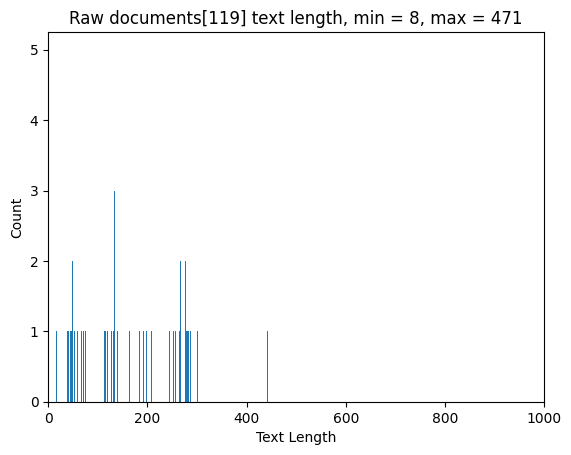

In [13]:
lengths = [len(doc["text"]) for doc in raw_documents]
counter = Counter(lengths)

plt.bar(counter.keys(), counter.values())
plt.xlim(0, 1000)
plt.xlabel("Text Length")
plt.ylabel("Count")
plt.title(f"Raw documents[{len(lengths):_}] text length, min = {min(counter)}, max = {max(counter)}")
plt.show()

In [14]:
# print(random.sample(raw_documents, 1))
print(raw_documents[9])

{'lang': 'ru', 'text': 'Если люди будут проводить больше времени в сети, подключаясь к метавселенной при помощи различных устройств, это может привести к снижению уровней физической активности и предоставить рекламодателям больше возможностей для продвижения вредной для здоровья продукции, такой как нездоровая еда, табак или алкоголь", – уточняет д-р Kremlin Wickramasinghe, и.о. руководителя Европейского офиса ВОЗ по профилактике неинфекционных заболеваний и борьбе с ними (Офис ВОЗ по НИЗ).', 'tr_lang': 'de', 'tr_text': 'Wenn man mehr Zeit online verbringt und mit dem Metaversum verbunden ist, kann sich das negativ auf das Bewegungsverhalten auswirken und der Wirtschaft viele neue Chancen eröffnen, für schädliche Produkte wie Fast Food, Tabak und Alkohol zu werben“, erklärt Dr. Kremlin Wickramasinghe, kommissarischer Leiter des Europäischen Büros der WHO für die Prävention und Bekämpfung nichtübertragbarer Krankheiten (Fachzentrum für nichtübertragbare Krankheiten).', 'file_id': 0}


In [15]:
df = pd.DataFrame(raw_documents)
print(f"Converted raw_documents to pandas DataFrame: {len(df):_}")

Converted raw_documents to pandas DataFrame: 119


In [16]:
# print(raw_documents[9])
print(df.iloc[9].to_dict())

{'lang': 'ru', 'text': 'Если люди будут проводить больше времени в сети, подключаясь к метавселенной при помощи различных устройств, это может привести к снижению уровней физической активности и предоставить рекламодателям больше возможностей для продвижения вредной для здоровья продукции, такой как нездоровая еда, табак или алкоголь", – уточняет д-р Kremlin Wickramasinghe, и.о. руководителя Европейского офиса ВОЗ по профилактике неинфекционных заболеваний и борьбе с ними (Офис ВОЗ по НИЗ).', 'tr_lang': 'de', 'tr_text': 'Wenn man mehr Zeit online verbringt und mit dem Metaversum verbunden ist, kann sich das negativ auf das Bewegungsverhalten auswirken und der Wirtschaft viele neue Chancen eröffnen, für schädliche Produkte wie Fast Food, Tabak und Alkohol zu werben“, erklärt Dr. Kremlin Wickramasinghe, kommissarischer Leiter des Europäischen Büros der WHO für die Prävention und Bekämpfung nichtübertragbarer Krankheiten (Fachzentrum für nichtübertragbare Krankheiten).', 'file_id': 0}


In [17]:
cols = ['text', 'tr_text']
for col in cols:
    df[col] = df[col].str.lower()
print(f"Converted texts to lower case: {len(df):_}")

Converted texts to lower case: 119


In [18]:
def get_augmented_data(data_frame):
    copy_df = data_frame.copy()
    temp = copy_df['text']
    copy_df['text'] = copy_df['tr_text']
    copy_df['tr_text'] = temp
    
    temp = copy_df['lang']
    copy_df['lang'] = copy_df['tr_lang']
    copy_df['tr_lang'] = temp
    
    return copy_df

In [19]:
augmented_df = get_augmented_data(df)
print(f"Created augmented df: {len(augmented_df):_}")

Created augmented df: 119


In [20]:
df = pd.concat([df, augmented_df], ignore_index=True)
print(f"Concated df and augmented_df: {len(df):_}")

Concated df and augmented_df: 238


In [21]:
def get_content_length(text):
    content = "".join(c for c in text if c.isalpha() or c.isspace())
    return len(content)

In [22]:
min_len = 20

filtered_df = df[df['text'].apply(get_content_length) >= min_len]

excluded_df = df[df['text'].apply(get_content_length) < min_len]

print(f"Filtered out small texts from data frame. Left: \
[{len(filtered_df):_} / {len(df):_}], {len(excluded_df)} excluded.")

Filtered out small texts from data frame. Left: [230 / 238], 8 excluded.


In [23]:
print(excluded_df.sample(n=1).to_dict(orient='records'))

[{'lang': 'ru', 'text': 'спасибо!', 'tr_lang': 'de', 'tr_text': 'ich danke ihnen.', 'file_id': 1}]


In [24]:
id = 5
print(df.iloc[id].to_dict())
print()
print(augmented_df.iloc[id].to_dict())

{'lang': 'ru', 'text': 'глубокое погружение в сеть: каковы связанные с этим риски?', 'tr_lang': 'de', 'tr_text': 'tiefer ins web eintauchen: wo liegen die risiken?', 'file_id': 0}

{'lang': 'de', 'text': 'tiefer ins web eintauchen: wo liegen die risiken?', 'tr_lang': 'ru', 'tr_text': 'глубокое погружение в сеть: каковы связанные с этим риски?', 'file_id': 0}


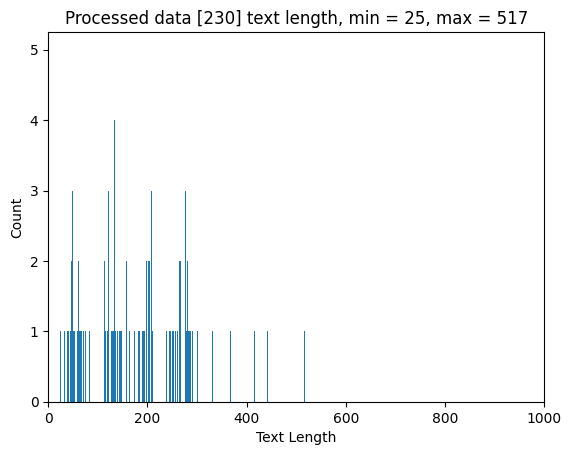

In [25]:
lengths = [len(row["text"]) for _, row in filtered_df.iterrows()]
counter = Counter(lengths)

plt.bar(counter.keys(), counter.values())
plt.xlim(0, 1000)
plt.xlabel("Text Length")
plt.ylabel("Count")
plt.title(f"Processed data [{len(lengths):_}] text length, min = {min(counter)}, max = {max(counter)}")
plt.show()

# Convert documents to langchain Document format

In [26]:
db_documents = [
    Document(
        page_content=doc_item["text"], 
        metadata={
            "lang": doc_item["lang"],
            "tr_lang": doc_item["tr_lang"],
            "tr_text": doc_item["tr_text"],
            "file_id": doc_item["file_id"]
        }) for _, doc_item in filtered_df.iterrows()]
print(f"Converted documents[{len(filtered_df):_}] into db format documents[{len(db_documents):_}]")

Converted documents[230] into db format documents[230]


In [27]:
splitter = RecursiveCharacterTextSplitter(chunk_size=250, chunk_overlap=50)
splitted_chunks = splitter.split_documents(db_documents)
print(f"From all {len(db_documents):_} documents {len(splitted_chunks):_} splitted_chunks created.")

From all 230 documents 279 splitted_chunks created.


In [28]:
min_docs = [doc for doc in splitted_chunks if get_content_length(doc.page_content) < 5]
print(f"Found {len(min_docs)} docs with small page_content.")

for d in min_docs[:10]:
    print(f"***  [{d.page_content}]")
print()

chunks = [chunk for chunk in splitted_chunks if get_content_length(chunk.page_content) > 5]
print(f"Filtered documents after splitting: [{len(chunks):_} / {len(splitted_chunks):_}]")

Found 0 docs with small page_content.

Filtered documents after splitting: [279 / 279]


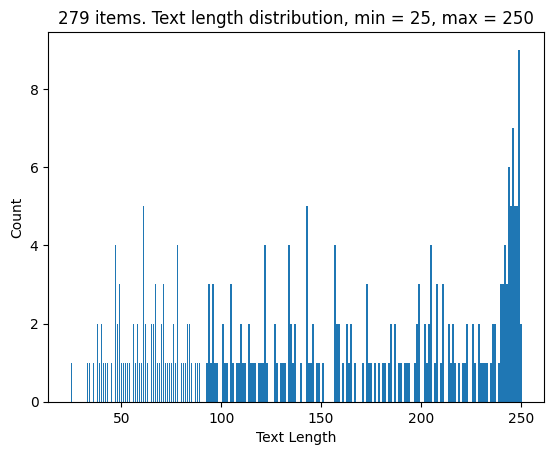

In [29]:
chunk_lengths = [len(chunk.page_content) for chunk in chunks]
chunks_counter = Counter(chunk_lengths)

plt.bar(chunks_counter.keys(), chunks_counter.values())
plt.xlabel("Text Length")
plt.ylabel("Count")
plt.title(f"{len(chunk_lengths):_} items. Text length distribution, min = {min(chunks_counter)}, max = {max(chunks_counter)}")
plt.show()

In [32]:
docs_to_save = [{"page_content": doc.page_content, "metadata": doc.metadata} for doc in chunks]
serialized_docs = json.dumps(docs_to_save, ensure_ascii=False)
print(f"Total characters to save: {len(serialized_docs):,}")
save_path = "data/docs.json"

with open(save_path, "w") as f:
    f.write(serialized_docs)
    print(f"Saved docs to {save_path}: {os.path.getsize(save_path) / 1000 / 1000:_.4f} MB")

Total characters to save: 123,913
Saved docs to data/docs.json: 0.1651 MB


In [33]:
total_size_bytes = 0
directory = Path(root_dir)

file_paths = [f for f in directory.rglob("*") if f.is_file() and not f.name.startswith(".")]

for file_path in file_paths:
    total_size_bytes += os.path.getsize(file_path)

print(f"Total size: {total_size_bytes / 1000 / 1000:_.4f} MB")

Total size: 0.0697 MB
